In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv("cleaning_data.csv")
data=data.drop("Unnamed: 0",axis=1)
data.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,ExterQual_TA,BsmtQual_Ex,KitchenQual_Ex,KitchenQual_TA,ExterQual_Ex,BsmtQual_TA
0,7,2003,2003,856.00,856.00,1710.00,2,8.00,2.00,548.00,208500.00,0,0,0,0,0,0
1,6,1976,1976,1262.00,1262.00,1262.00,2,6.00,2.00,460.00,181500.00,1,0,0,1,0,0
2,7,2001,2002,920.00,920.00,1786.00,2,6.00,2.00,608.00,223500.00,0,0,0,0,0,0
3,7,1915,1970,756.00,961.00,1717.00,1,7.00,3.00,642.00,140000.00,1,0,0,0,0,1
4,8,2000,2000,1145.00,1145.00,2198.00,2,9.00,3.00,836.00,250000.00,0,0,0,0,0,0


In [3]:
#Division of data as x and y
x=data.drop("SalePrice",axis=1).values
y=data["SalePrice"].values

In [4]:
#dividing data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:
#standardization of data
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [6]:
#Create the table with statsmodels
model_sm=sm.OLS(y,sm.add_constant(x)).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     534.6
Date:                Mon, 01 May 2023   Prob (F-statistic):               0.00
Time:                        00:22:36   Log-Likelihood:                -16887.
No. Observations:                1460   AIC:                         3.381e+04
Df Residuals:                    1443   BIC:                         3.390e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.597e+05   1.01e+05     -9.461      0.000   -1.16e+06   -7.61e+05
x1          1.132e+04    875.915     12.926      0.000    9603.844     1.3e+04
x2           238.6455     36.971      6.455      0.000     166.124     311.167
x3           246.1366     45.921      5.360      0.000     156.058     336.216
x4            26.0004      3.224      8.064      0.000      19.676      32.325
x5             5.3244      3.503      1.520      0.129      -1.547      12.196
x6            57.3838      3.190     17.991      0.000      51.127      63.641
x7         -6750.0395   1861.985     -3.625      0.000   -1.04e+04   -3097.552
x8         -2237.4901    831.433     -2.691      0.007   -3868.436    -606.544
x9          4457.3852   2185.625      2.039      0.042     170.043    8744.727
x10           24.8208      7.523      3.300      0.001      10.064      39.577
x11        -3937.6651   2229.276     -1.766      0.078   -8310.634     435.304
x12         1.765e+04   3219.798      5.483      0.000    1.13e+04     2.4e+04
x13         1.435e+04   3497.508      4.104      0.000    7494.032    2.12e+04
x14        -7386.9913   1957.004     -3.775      0.000   -1.12e+04   -3548.113
x15         -534.8842   4722.601     -0.113      0.910   -9798.783    8729.015
x16        -3446.7181   1952.474     -1.765      0.078   -7276.708     383.272
==============================================================================
Omnibus:                      302.588   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3160.403
Skew:                          -0.649   Prob(JB):                         0.00
Kurtosis:                      10.090   Cond. No.                     5.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

100%|██████████| 42/42 [00:52<00:00,  1.26s/it]


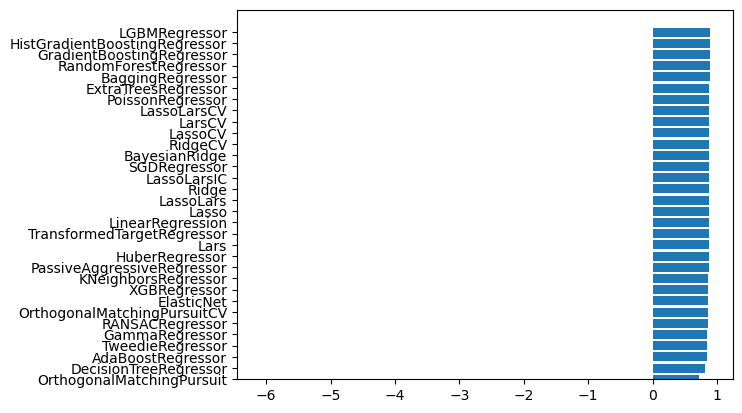

In [7]:
#Determining the model that gives the high r2 value with lazy predict
clf=LazyRegressor()
models,predict=clf.fit(x_train,x_test,y_train,y_test)
sort=models.sort_values(by="R-Squared")
fig, ax = plt.subplots()
plt.barh(sort.index,sort["R-Squared"])
plt.ylim(bottom=10, top=43)
plt.show()

In [8]:
import lightgbm as lgbm
lgbm=lgbm.LGBMRegressor()
lgbm.fit(x_train,y_train)

LGBMRegressor()

In [9]:
#I measured the success of the model
y_pred=lgbm.predict(x_test)
r2_lgbm=r2_score(y_test,y_pred)
print(r2_lgbm)

0.8974815138223777


In [10]:
scores = cross_val_score(lgbm, x, y, cv=5, scoring='r2')
print("mean R^2 score: {:.2f}".format(scores.mean()))

mean R^2 score: 0.86


In [11]:
#saving the model
import pickle 
filename_model="model.pickle"
filename_scaler="standard_scaler.pkl"
pickle.dump(lgbm,open(filename_model,"wb"))
pickle.dump(sc,open(filename_scaler,"wb"))